<a href="https://colab.research.google.com/github/cse97/COMPUTATIONAL-GEOMETRY-CODES-CU-2nd-sem-assignment-/blob/main/Jarvis'_march_algorithm_for_convex_hull_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduce N: 10


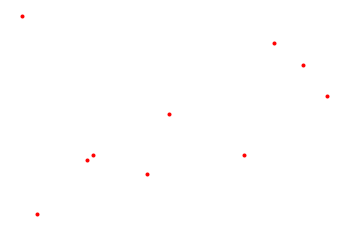

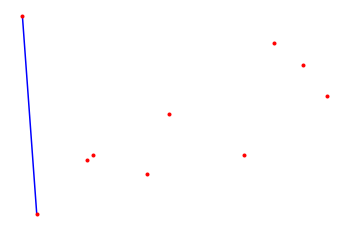

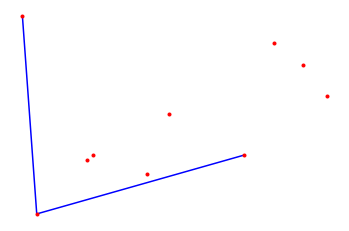

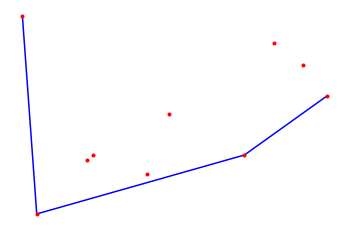

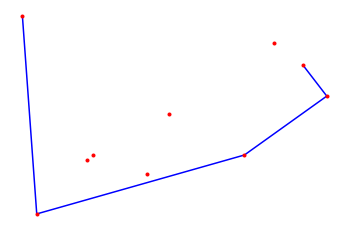

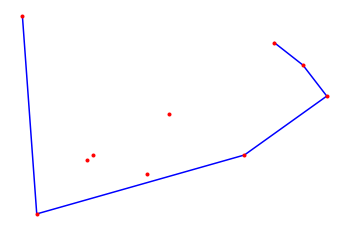

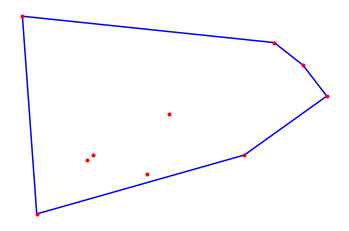

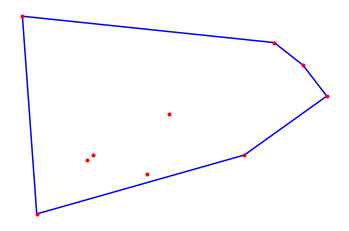

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Function to know if we have a CCW turn
def CCW(p1, p2, p3):
	if (p3[1]-p1[1])*(p2[0]-p1[0]) >= (p2[1]-p1[1])*(p3[0]-p1[0]):
		return True
	return False

# Main function:
def GiftWrapping(S):
	plt.figure()  # Define figure
	index = 0
	n = len(S)
	P = [None] * n
	l = np.where(S[:,0] == np.min(S[:,0]))
	pointOnHull = S[l[0][0]]
	i = 0
	while True:
		P[i] = pointOnHull
		endpoint = S[0]
		for j in range(1,n):
			if (endpoint[0] == pointOnHull[0] and endpoint[1] == pointOnHull[1]) or not CCW(S[j],P[i],endpoint):
				endpoint = S[j]
		i = i + 1
		pointOnHull = endpoint
		J = np.array([P[k] for k in range(n) if P[k] is not None])
		plt.clf()               # Clear plot
		plt.plot(J[:,0],J[:,1], 'b-', picker=5)   # Plot lines
		plt.plot(S[:,0],S[:,1],".r")              # Plot points
		plt.axis('off')         # No axis
		plt.show(block=False)   # Close plot
		plt.pause(0.0000001)    # Mini-pause before closing plot
		index += 1
		if endpoint[0] == P[0][0] and endpoint[1] == P[0][1]:
			break
	for i in range(n):
		if P[-1] is None:
			del P[-1]
	P = np.array(P)
	
	# Plot final hull
	plt.clf()
	plt.plot(P[:,0],P[:,1], 'b-', picker=5)
	plt.plot([P[-1,0],P[0,0]],[P[-1,1],P[0,1]], 'b-', picker=5)
	plt.plot(S[:,0],S[:,1],".r")
	plt.axis('off')
	plt.show(block=False)
	plt.pause(0.0000001)
	return P

def main():
	try:
		N = int(sys.argv[1])
	except:
		N = int(input("Introduce N: "))
  
	# By default we build a random set of N points with coordinates in [0,300)x[0,300):
	P = np.array([(np.random.randint(0,300),np.random.randint(0,300)) for i in range(N)])
	L = GiftWrapping(P)
	
	# We use the predefined figure
	plt.plot(L[:,0],L[:,1], 'b-', picker=5)
	plt.plot([L[-1,0],L[0,0]],[L[-1,1],L[0,1]], 'b-', picker=5)
	plt.plot(P[:,0],P[:,1],".r")
	plt.axis('off')
	plt.show()

if __name__ == '__main__':
	main()
